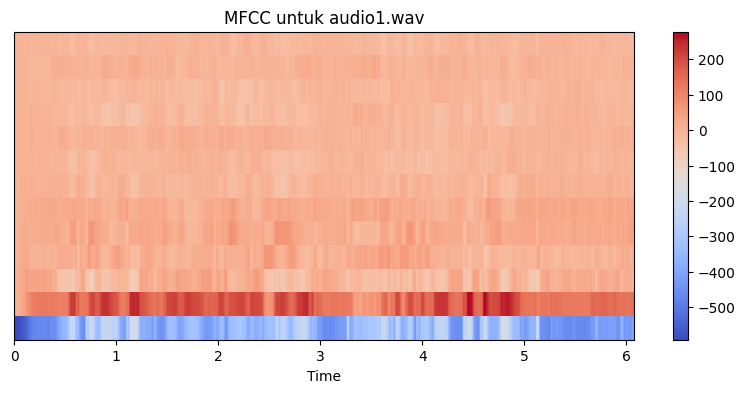

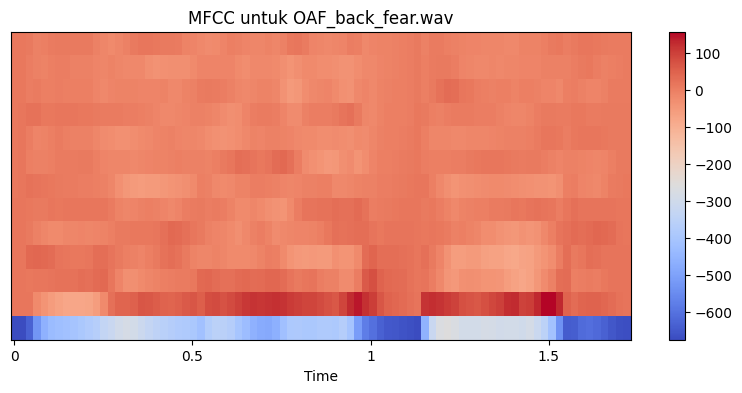

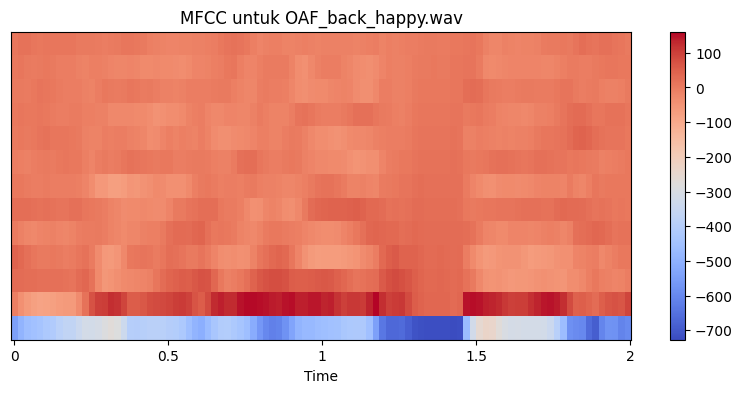

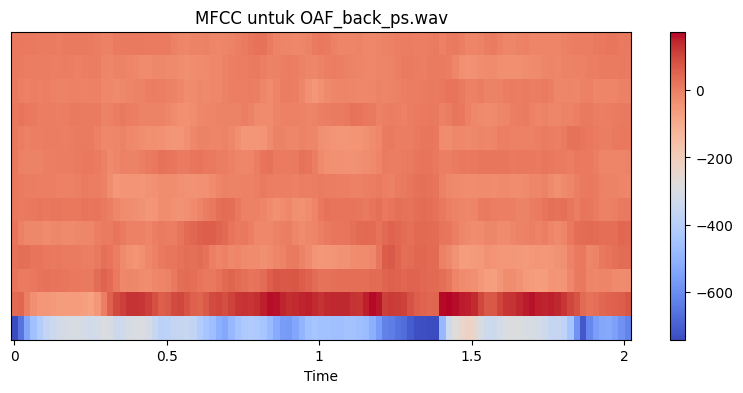

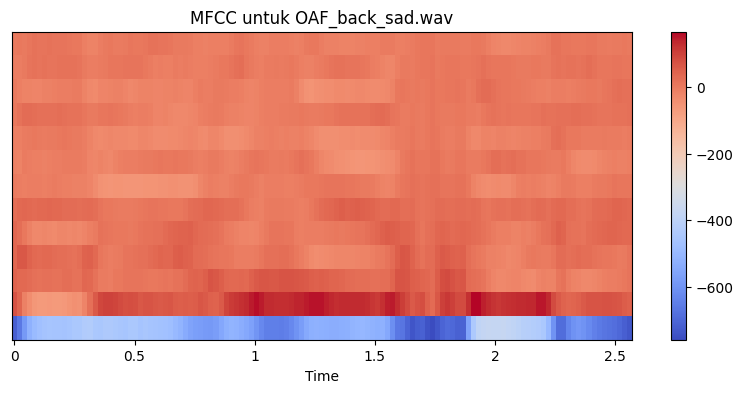

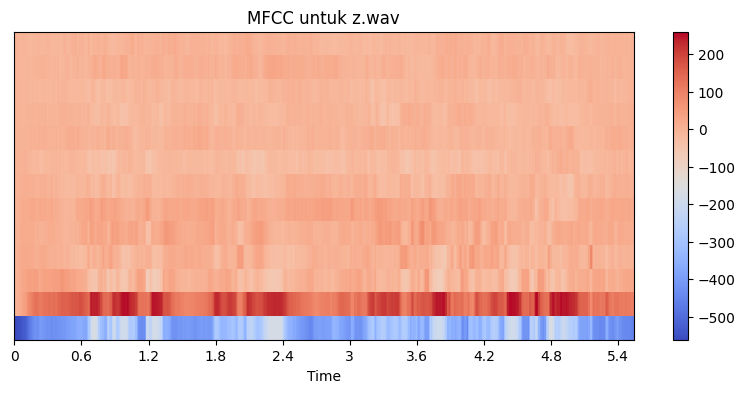

Fitur MFCC untuk audio data/z.wav:
[-5.33266846e+02  1.54341721e+02  8.32393551e+00  2.67248917e+01
 -4.01340914e+00  2.43261127e+01 -2.29177690e+00 -8.37849712e+00
 -7.54325449e-01  2.68863773e+00 -1.53452215e+01  3.08652878e+00
 -1.45899057e+01 -1.11535120e+00 -6.72783470e+00 -7.03558397e+00
  1.06730652e+00 -2.47956872e+00 -1.79182315e+00  1.03561425e+00
  5.51689327e-01  3.97541255e-01  5.81404305e+00  2.83682990e+00
  2.81341839e+00  2.44267249e+00  1.25278556e+00  3.11731577e+00
 -3.93659472e-01 -1.45468855e+00 -2.72304749e+00 -5.90394258e+00
 -1.73673809e+00 -1.94462705e+00 -5.39607954e+00 -2.23162770e+00
 -1.42269349e+00 -3.33965898e+00 -1.23854947e+00 -1.76863635e+00
 -1.59653294e+00 -3.62753224e+00 -2.24986601e+00 -2.65168977e+00
 -8.64619195e-01 -2.69124150e+00 -9.35323536e-01 -1.61530924e+00
 -4.97740060e-01  1.28056014e+00]
Panjang fitur MFCC: 50


In [8]:
import librosa
import librosa.display
import IPython.display as ipd
import os
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk ekstraksi fitur MFCC
def feature_extraction(file_path):
    # Memuat file audio, memastikan sample rate asli tetap dipertahankan
    x, sample_rate = librosa.load(file_path, sr=None, res_type='kaiser_fast')
    
    # Tentukan panjang audio yang diinginkan, misalnya 22050 sampel (1 detik)
    target_length = 22050
    
    # Jika panjang audio lebih panjang dari target, kita potong
    if len(x) > target_length:
        x = x[:target_length]
    # Jika panjang audio lebih pendek dari target, kita beri padding
    elif len(x) < target_length:
        x = np.pad(x, (0, target_length - len(x)), mode='constant')

    # Ekstraksi MFCC dari audio
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=50).T, axis=0)
    
    return mfcc

# Menyimpan fitur untuk setiap file audio dalam dictionary
features = {}
directory = 'audio data/'  # Ganti dengan direktori yang sesuai

# Memeriksa apakah direktori ada
if not os.path.exists(directory):
    print(f"Direktori '{directory}' tidak ditemukan.")
else:
    # Menelusuri file audio dalam folder
    for audio in os.listdir(directory):
        audio_path = os.path.join(directory, audio)
        
        # Memastikan hanya file .wav yang diproses
        if audio_path.endswith('.wav'):
            features[audio_path] = feature_extraction(audio_path)

            # Menampilkan MFCC pertama sebagai gambar untuk memverifikasi
            x, sample_rate = librosa.load(audio_path, sr=None)
            mfcc = librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=13)

            plt.figure(figsize=(10, 4))
            librosa.display.specshow(mfcc, x_axis='time', sr=sample_rate)
            plt.colorbar()
            plt.title(f'MFCC untuk {audio}')
            plt.show()

    # Menampilkan fitur untuk file terakhir
    if features:
        last_audio_path = list(features.keys())[-1]
        print(f"Fitur MFCC untuk {last_audio_path}:")
        print(features[last_audio_path])
        print(f"Panjang fitur MFCC: {len(features[last_audio_path])}")
    else:
        print("Tidak ada file audio yang diproses.")
